# Crypto-Cosmology, Part 1: Wormhole

## Notebook structure

The notebook is divided into several sections, which should allow for a better reading experience.

* **Context**: this section provides an introduction to the protocols, technology and objective involved in this analysis
* **Data**: briefly presents how the data has been obtained and its structure
* **Key findings**: lists the main discoveries obtained from this analysis
* **Analysis**: the core steps actual process that led to the key findings
* **Appendix**: this section contains data preparation and cleaning steps. They are required to be executed before the analysis section, but for better readability we have moved it to the end of the notebook.

## Context
Bla bla
### Wormhole

https://twitter.com/wormholecrypto/status/1450540170348949504

### Terra Bridge


### Objective

As Wormhole has added Terra support with the Columbus 5 upgrade, we analyze the initial activity and try to identify patterns and behaviors.

Some interesting questions are the followings:
* How many users are engaging, what tokens are they receiving vs sending? 
* Which destinations/sources are most popular? 
* What is the adoption rate, i.e. how rapidly are users choosing to use Wormhole over the Terra-specific Bridge? 
* Anything else you observe of interest?


## Data

In this section we will describe how the data has been queried and its structure.

### Query
Several queries have been performed to retrieve data regarding both bridges.

For each bridge, we provide a quick overview of the key points that our queries are constructed upon.

**Wormhole related queries**

The contract address of the Wormhole smart contract is: *terra10nmmwe8r3g99a9newtqa7a75xfgs2e8z87r2sf*.
Transactions that sent assets by calling that contract and executed the message *initiate_transfer* have been queried as Wormhole transactions, sending assets from Terra to other chains. This type of transaction also included the *recipient_chain* field which is an integer representing the destination chain. The mapping is the following:

* 1: Solana
* 2: Ethereum
* 3: Terra
* 4: BSC
* 5: Polygon

Terra transaction receiving Terra assets (both native and wrapped) from other chains via Wormhole have been identified has the ones having the sender as the Wormhole contract and being of the event_type *transfer*. Unfortunately, these transactions do not allow to identify the source chain and we therefore don't have this information for this kind of transaction.

For wrapped assets received from other chains, we identified transactions with the contract address as the one for the Wormhole and the action *complete_transfer_wrapped*. Again, no source chain info is available.

The complete queries can be found here:
* [Native tokens (Luna and uusd) received on Terra from the Wormhole]('https://api.flipsidecrypto.com/api/v2/queries/657279fb-8a07-4089-bf08-307fb7f1325d/data/latest')
* [Wrapped tokens received on Terra from the Wormhole]('https://api.flipsidecrypto.com/api/v2/queries/f5ee257d-91d9-4a1d-a3e3-c2cd14f7790b/data/latest')
* [Assets sent from Terra to other chains using Wormhole]('https://api.flipsidecrypto.com/api/v2/queries/6cecbc05-4540-4c33-9557-585aec1af791/data/latest')

**Terra bridge related queries**

Each chain supported by the Terra Bridge has its own address. Send and receive transactions involving one specific chain, are always directed or received from that contract. We therefore queried transactions from and to those addresses and labeled them accordingly. The contract addresses for each chain are the followings:

* ETH: terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc
* BSC: terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2
* Harmony: terra1rtn03a9l3qsc0a9verxwj00afs93mlm0yr7chk

Queries have been divided due to API space limitations. The complete queries can be found here:
* [Assets sent from Terra to other chains using Terra Bridge]('https://api.flipsidecrypto.com/api/v2/queries/e6369cbf-6ea1-4d84-9e45-38ad88caea73/data/latest')
* [Assets received from Ethereum via Terra Bridge]('https://api.flipsidecrypto.com/api/v2/queries/a1688e27-7fcf-44ad-b849-e61dd638d8e1/data/latest')
* [Assets received from other chains (not Ethereum) via Terra Bridge Pt. 1]('https://api.flipsidecrypto.com/api/v2/queries/f6ac0f33-eaee-4983-82c3-7bba1ccc0bc2/data/latest')
* [Assets received from other chains (not Ethereum) via Terra Bridge Pt. 2]('https://api.flipsidecrypto.com/api/v2/queries/f566ad03-b305-448c-8a14-7908c0bfa7d7/data/latest')

### Structure

* Each record in the dataframe reppresent either a send or receive transaction from/to one of the two bridge
* The record generally present the sender address, receiver address, contract address, amount, token (denom or token address for wrapped tokens), timestamp and destination chain (not for receive tx from Wormhole).


## Key Findings
* 
* 
* 

# Analysis

The analysis focuses on the Wormhole activity. Later on in the notebook we will include data from the Terra Bridge to carry on a comparison.

## Transactions

First of all, let's look at the transactions.

* How many Wormhole transactions have been executed? 

In [188]:
wh_receive_.tx_id.count() + wh_send.tx_id.count()

5998

* What is the number of daily transactions?

In [189]:
daily_tx.mean()

153.4047619047619

* What does it look like over time?

<AxesSubplot:xlabel='Day', ylabel='Number of daily transactions'>

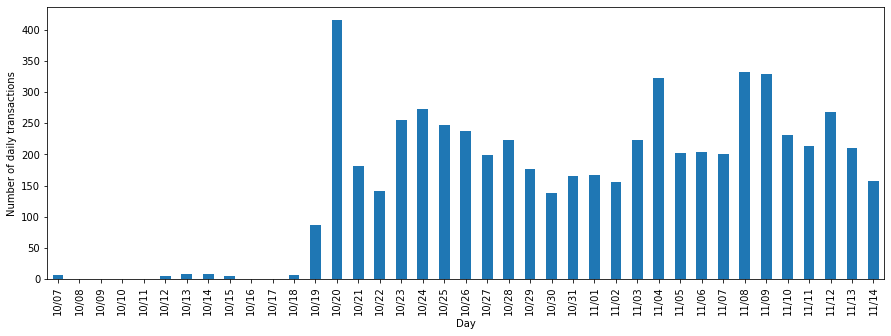

In [190]:
tot_daily_txs = wh_send[['month_day', 'tx_id']].append(wh_receive_[['month_day', 'tx_id']])
daily_tx = add_missing_days(tot_daily_txs.groupby("month_day").tx_id.count())
ax = daily_tx.plot(kind='bar')
ax.set(ylabel='Number of daily transactions', xlabel='Day')
ax

It looks like we have few transactions from before the official Wormhole support for Terra (19/10). These are possibly test transactions. We might have to exclude them to obtain a realistic average number of daily transactions.

In [191]:
daily_tx[daily_tx.index > '10/18'].mean()

220.74074074074073

What is the ratio between send and receive?

In [192]:
f"{'{:.2f}'.format(wh_receive_.tx_id.count()/(wh_send.tx_id.count()+wh_receive_.tx_id.count()) * 100)}%"

'49.58%'

What does the ratio look like daily over time?

[Text(0, 0.5, 'Number of daily transactions'), Text(0.5, 0, 'Day')]

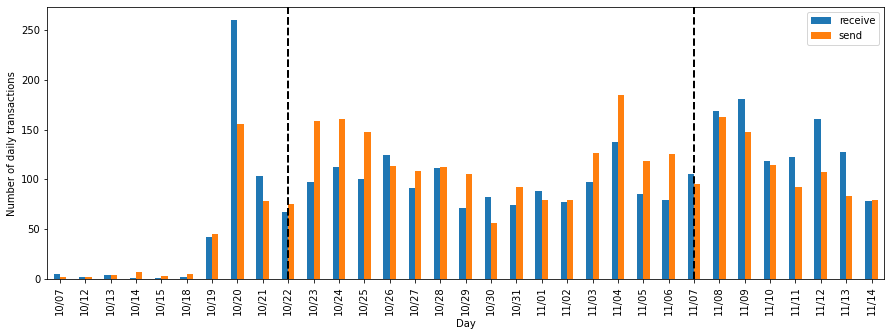

In [194]:
ax = pd.concat([wh_receive_.groupby("month_day").tx_id.count().rename('receive'),\
               wh_send.groupby("month_day").tx_id.count().rename('send')], axis=1).plot(kind='bar')
ax.axvline(ymin=0, x=9, ymax=600, color='black', linestyle='--', lw=2)
ax.axvline(ymin=0, x=25, ymax=600, color='black', linestyle='--', lw=2)
ax.axvline(ymin=0, x=9, ymax=600, color='black', linestyle='--', lw=2)
ax.set(ylabel='Number of daily transactions', xlabel='Day')

**Observations**
* We have recorded a total of 5906 transactions performed using the Wormhole since its launch on Terra up until the 15th of November
* On average 202 transactions are performed daily
* The distribution between send and receive transaction seems fairly balanced, with 49% of all transactions being receive transactions.
* The ratio of the two types of operation over time shows three main periods (dashed lines). The first period saw a higher number of receive txs compared to send ones. Between the two line, we saw an increase of send txs and lately we saw receive txs catching up again and surpassing send txs.

## Distinct address
Let's now focus on distinct addresses (hence, in most cases distinct users)
* What is the number of distinct users interacting with Wormhole from Terra so far?

In [195]:
tot_unique_addr = wh_send[['month_day', 'sender']].append(wh_receive_[['month_day', 'sender']])
len(tot_unique_addr.sender.unique())

1983

What about over time? Any particular increase or decrease?

In [197]:
daily_unique_addresses = add_missing_days(tot_unique_addr.groupby("month_day").sender.nunique())

[]

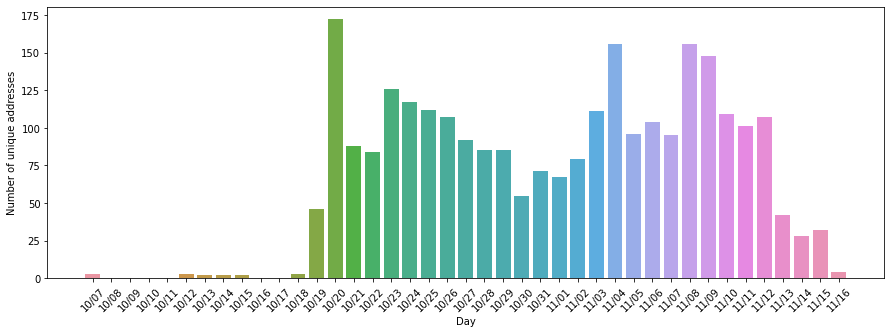

In [32]:
plt.xticks(rotation=45)
ax = sns.barplot(daily_unique_addresses.index, daily_unique_addresses.values)
ax.set(ylabel='Number of unique addresses', xlabel='Day')
ax.plot()

What is the daily average number of distinct users interacting with Wormhole?

In [198]:
daily_unique_addresses[daily_unique_addresses.index > '10/18'].mean()

101.4074074074074

**Observations**
* 
* 

## Tokens
* What tokens have been sent/received?
* What tokens are most popular?

In [35]:
token_txs = pd.concat([wh_receive_.token_name.value_counts(), wh_send.token_name.value_counts()], axis=1).fillna(0)

In [36]:
token_amounts = pd.concat([wh_receive_.groupby("token_name").amount.sum(), wh_send.groupby("token_name").amount.sum()], axis=1).fillna(0)

In [37]:
wh_receive_.token_name.append(wh_send.token_name).unique()

array(['uluna', 'uusd', 'ORION_Terra', 'whORION_BSC', 'wh_Solana',
       'whUSDT_BSC', 'whWETH_Ethereum', 'whWBNB_BSC', 'whSOL_Solana',
       'whUSDT_Ethereum', '', 'whUST_Polygon', 'whLUNA_Polygon',
       'whWBTC_Ethereum', 'whATOM_BSC', 'whUSDC_Polygon', 'whETH_Solana',
       'whMIR_BSC', 'whUSDT_Polygon', 'MINE_Terra', 'MIR_Terra',
       'ANC_Terra'], dtype=object)

[Text(0, 0.5, 'Number of transactions'), Text(0.5, 0, 'Asset transferred')]

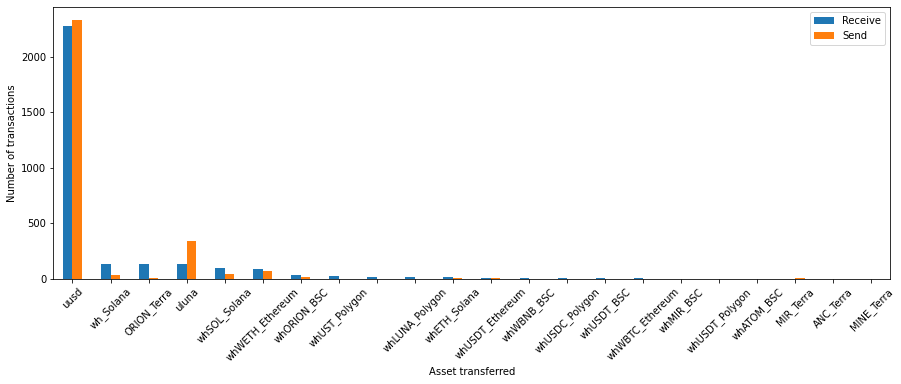

In [38]:
token_txs.columns = ['Receive','Send']
ax = token_txs.plot(kind='bar', rot=45)
ax.set(ylabel='Number of transactions', xlabel='Asset transferred')

[Text(0, 0.5, 'Total amount transferred'), Text(0.5, 0, 'Asset')]

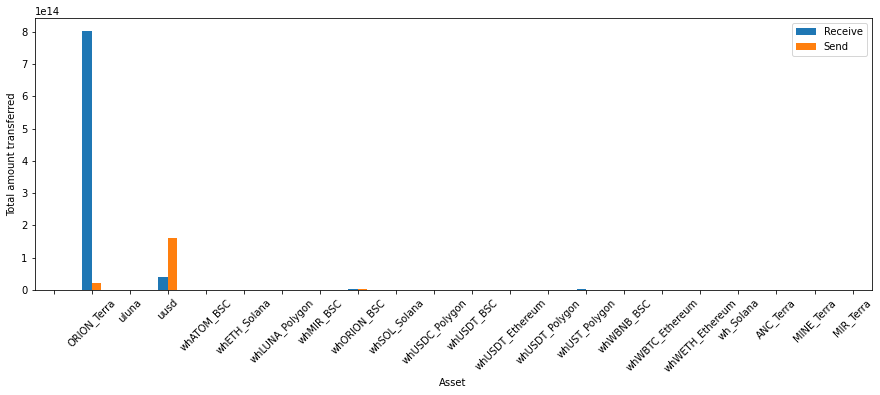

In [39]:
token_amounts.columns = ['Receive','Send']
ax = token_amounts.plot(kind='bar', rot=45)
ax.set(ylabel='Total amount transferred', xlabel='Asset')

In [40]:
wh_receive_.sort_values(by="amount", ascending=False).head()

,amount,block_timestamp,recipient,original_sender,sender,tx_id,token_name,month_day,year_month_day
411,406000000000000,2021-11-02 20:40:03+00:00,"""terra1w5l9ggryqy8q49pyfl9gqrfwdugynmd09xvwlk""","""terra1w5l9ggryqy8q49pyfl9gqrfwdugynmd09xvwlk""","""terra1w5l9ggryqy8q49pyfl9gqrfwdugynmd09xvwlk""",1060A41659F5B72523815A0AD888AF69FA729EF722D06239400C2D8A80A48798,ORION_Terra,11/02,b.year/11/02
565,214286000000000,2021-11-15 14:19:12+00:00,"""terra1w5l9ggryqy8q49pyfl9gqrfwdugynmd09xvwlk""","""terra1w5l9ggryqy8q49pyfl9gqrfwdugynmd09xvwlk""","""terra1w5l9ggryqy8q49pyfl9gqrfwdugynmd09xvwlk""",78519BD163D14E51458087B27AB2198DC95A04C0762E77660AB30A1E65E92B4F,ORION_Terra,11/15,b.year/11/15
150,14285714285714,2021-11-09 00:45:20+00:00,"""terra15ly4zprkshh73k59g6ssdf3027zl6nd59rljpe""","""terra15ly4zprkshh73k59g6ssdf3027zl6nd59rljpe""","""terra15ly4zprkshh73k59g6ssdf3027zl6nd59rljpe""",9BC236FB9B447BCC445BC4E2DFCE9826AC2A577FADBD4F00527DE7CC7C81165B,ORION_Terra,11/09,b.year/11/09
389,13356283590000,2021-11-09 14:37:01+00:00,"""terra12chw9xgz3wg6q50vtqru932n095pyt4lwxg97c""","""terra12chw9xgz3wg6q50vtqru932n095pyt4lwxg97c""","""terra12chw9xgz3wg6q50vtqru932n095pyt4lwxg97c""",5A0888B65EE2815AAB30467A833597FD1C27B6AE86418EB879871EC46B3398A3,ORION_Terra,11/09,b.year/11/09
32,9946383000000,2021-11-14 21:27:14+00:00,"""terra18dhzhvr76z0n668gcx242p35z7wuyd8xt0aq4t""","""terra18dhzhvr76z0n668gcx242p35z7wuyd8xt0aq4t""","""terra18dhzhvr76z0n668gcx242p35z7wuyd8xt0aq4t""",68C7284239F59499F17E16BA75D5CD57F75A6939548580CD8B15B79DC6DCB2AC,ORION_Terra,11/14,b.year/11/14


[Text(0, 0.5, 'Total of amount transferred'), Text(0.5, 0, 'Asset')]

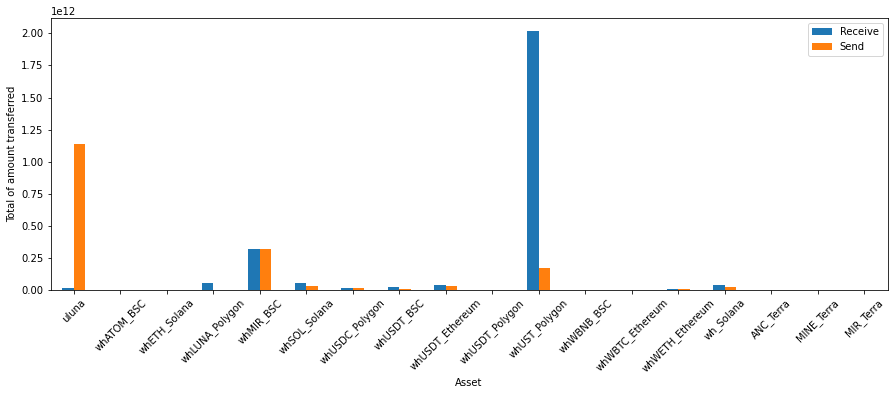

In [41]:
ax = token_amounts[(token_amounts.index != 'whORION_BSC')& (token_amounts.index != 'ORION_Terra') & (token_amounts.index != '')\
                       & (token_amounts.index != 'uusd')].plot(kind='bar', rot=45)
ax.set(ylabel='Total of amount transferred', xlabel='Asset')

**Observations**
* 
* 

## UST transactions
* Average amount of ust sent/received per day

In [42]:
wh_receive_ust = wh_receive_[wh_receive_.token_name == 'uusd']
wh_send_ust = wh_send[wh_send.token_name == 'uusd']

In [43]:
f"{wh_send_ust.amount.sum()/1000000/1000000} millions"

'161.614850616342 millions'

In [44]:
f"{wh_receive_ust.amount.sum()/1000000/1000000} millions"

'40.832040751038 millions'

In [45]:
(wh_send_ust.amount/1000000).describe().apply(lambda x: format(x, 'f'))

count        2328.000000
mean        69422.186691
std       1261317.712765
min             0.000001
25%            20.000000
50%           410.000000
75%          3135.000000
max      41999990.000000
Name: amount, dtype: object

In [46]:
wh_receive_ust[wh_receive_ust.amount < (wh_receive_ust.amount/1000000).quantile([.90]).iloc[0]].amount.mean()

5818.4324324324325

In [47]:
wh_send_ust[wh_send_ust.amount < (wh_send_ust.amount/1000000).quantile([.90]).iloc[0]].amount.mean()

7779.0

**Observations**
* 
* 

## Chains
* Transaction per chain, and overtime
* Any increase in usage for some chains? What about ratio wise on all txs

In [48]:
tot_unique_addr = wh_send[['month_day', 'sender']].append(wh_receive_[['month_day', 'sender']])

In [49]:
wh_send["recipient_chain_name"]=wh_send.recipient_chain.apply(lambda x: chain_ids[x-1])

[Text(0, 0.5, 'Number of transactions'), Text(0.5, 0, 'Destination chain')]

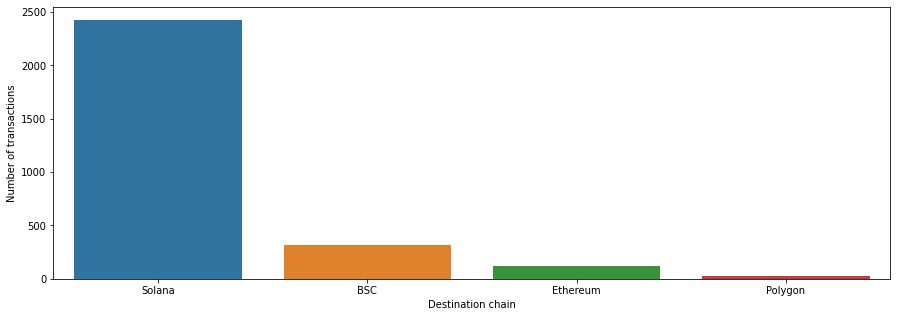

In [50]:
df = wh_send.recipient_chain_name.value_counts()
ax = sns.barplot(df.index,df.values)
ax.set(ylabel='Number of transactions', xlabel='Destination chain')

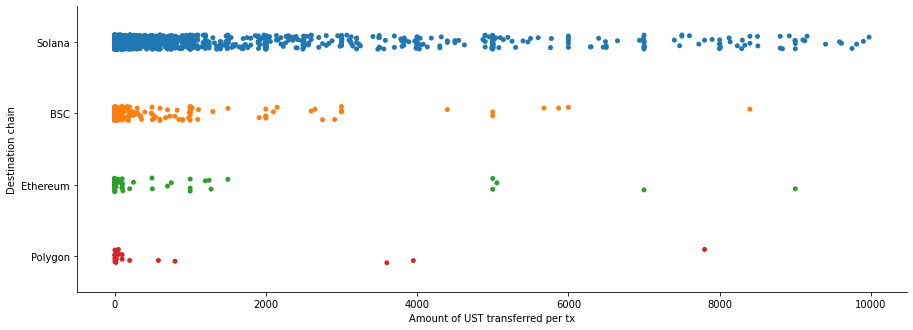

In [51]:
df = wh_send[(wh_send.denom=='uusd')&(wh_send.amount<10000000000)]
df.amount = df.amount/1000000
ax = sns.catplot(y="recipient_chain_name", x="amount", data=df, height=4.5, aspect=2.8)
ax.set(ylabel='Destination chain', xlabel='Amount of UST transferred per tx')

[Text(0, 0.5, 'Number of Wormhole daily transactions'), Text(0.5, 0, 'Day')]

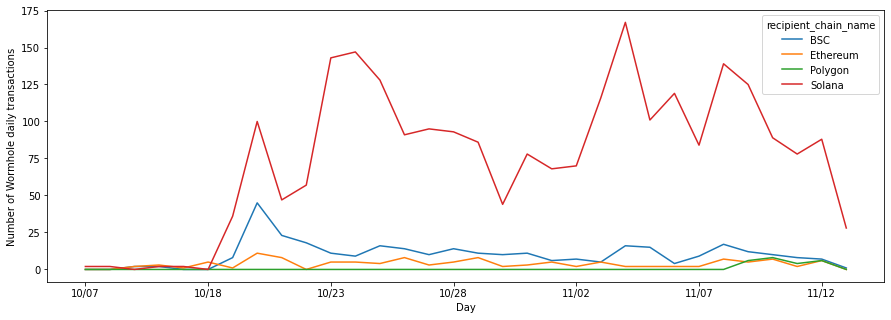

In [52]:
ax = wh_send.groupby(["recipient_chain_name","month_day"]).count().reset_index()\
    .pivot(index='month_day', columns='recipient_chain_name', values='tx_id')\
    .fillna(0)\
    .reset_index()\
    .set_index("month_day").plot(kind="line")
ax.set(ylabel='Number of Wormhole daily transactions', xlabel='Day')

**Observations**
* 
* 

## Most active addresses

In [53]:
fields = ['block_timestamp', 'address', 'amount', 'token_name']
wh_send.rename(columns={'sender':'address'}, inplace=True)
wh_receive_['address'] = wh_receive.apply(lambda row: row.recipient if row.original_sender == 'terra10nmmwe8r3g99a9newtqa7a75xfgs2e8z87r2sf'\
                     else row.original_sender, axis=1)
token_addr = wh_receive_[fields].append(wh_send[fields])

[]

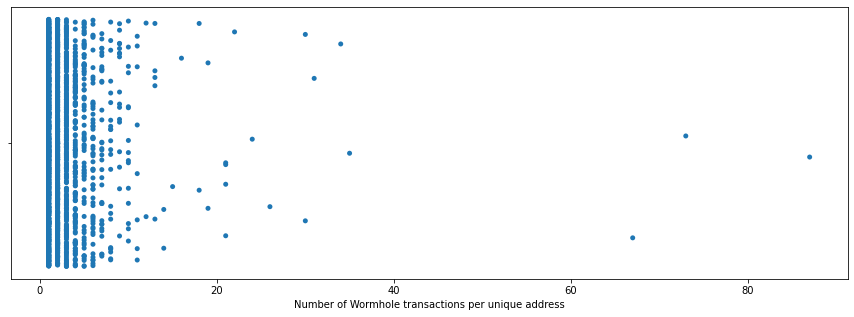

In [54]:
ax = sns.stripplot(token_addr.address.value_counts())
ax.set(xlabel='Number of Wormhole transactions per unique address')
ax.plot()

In [55]:
token_addr.address.value_counts().describe()

count    2249.000000
mean        2.626056
std         3.842571
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        87.000000
Name: address, dtype: float64

In [56]:
token_addr.address.value_counts().quantile([0.9,0.99])

0.90     5.00
0.99    13.52
Name: address, dtype: float64

**Observations**
* 
* 

## Usage comparison with Terra Bridge

In [57]:
tb_all.type_op.value_counts()

RECEIVE    250644
SEND        98785
Name: type_op, dtype: int64

In [58]:
tb_all.chain.value_counts()

BSC         264557
Ethereum     70018
Harmony      14854
Name: chain, dtype: int64

<AxesSubplot:xlabel='Day', ylabel='Number of Terra Bridge daily transactions'>

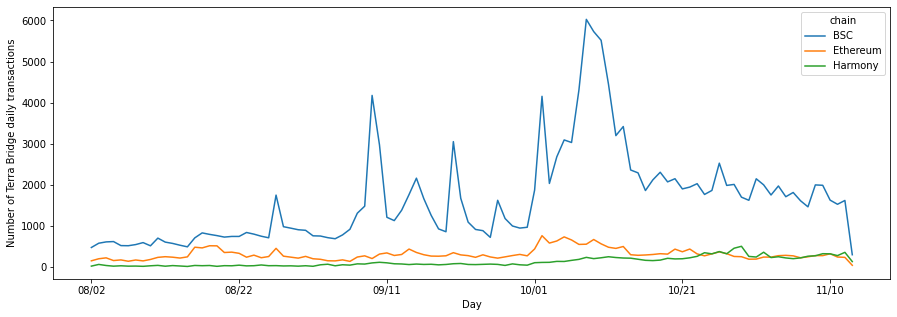

In [59]:
ax = tb_all[tb_all.year_month_day > '2021/08/01'].groupby(["chain","month_day"]).count().reset_index()\
    .pivot(index='month_day', columns='chain', values='tx_id')\
    .fillna(0)\
    .reset_index()\
    .set_index("month_day").plot(kind="line")
ax.set(ylabel='Number of Terra Bridge daily transactions', xlabel='Day')
ax

In [60]:
chains_to_compare = ['BSC','Ethereum', 'Harmony']

<AxesSubplot:xlabel='Day', ylabel='Number of Terra Bridge daily transactions'>

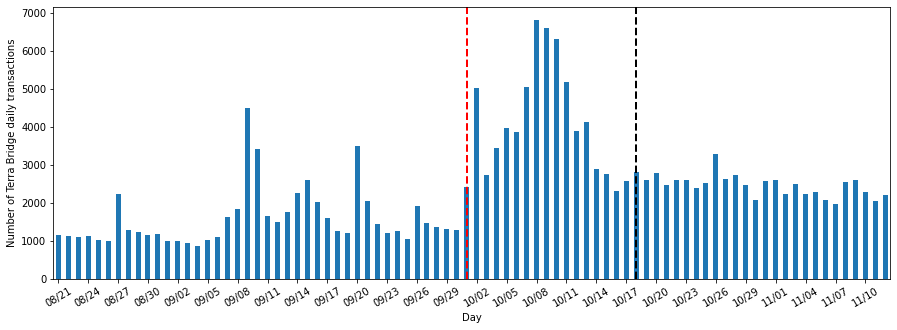

In [61]:
df = tb_all[(tb_all.year_month_day > '2021/08/20')&(tb_all.chain.isin(chains_to_compare))]\
    .groupby("month_day").count().tx_id.sort_index()[:-1]
ax = df.plot(kind='bar', rot=30)
ax.axvline(ymin=0, x=41, ymax=600, color='r', linestyle='--', lw=2)
ax.axvline(ymin=0, x=58, ymax=600, color='black', linestyle='--', lw=2)
ax.set_xticks([i for i in range(len(df.index))][0::3])
ax.set(ylabel='Number of Terra Bridge daily transactions', xlabel='Day')
ax

In [62]:
tb_all[(tb_all.month_day >= '10/18')&(tb_all.month_day < '10/25')&(tb_all.chain.isin(chains_to_compare))]\
    .groupby("month_day").count().tx_id.describe()

count       7.000000
mean     2612.000000
std       149.240298
min      2391.000000
25%      2540.500000
50%      2611.000000
75%      2699.000000
max      2803.000000
Name: tx_id, dtype: float64

In [63]:
tb_all[(tb_all.month_day >= '11/05')&(tb_all.month_day < '11/12')&(tb_all.chain.isin(chains_to_compare))]\
    .groupby("month_day").count().tx_id.describe()

count       7.000000
mean     2259.714286
std       244.479525
min      1982.000000
25%      2058.500000
50%      2276.000000
75%      2424.000000
max      2595.000000
Name: tx_id, dtype: float64

In [64]:
before_wh = tb_all[(tb_all.year_month_day > '2021/09/01')&(tb_all.month_day < '10/18')&\
            (tb_all.chain.isin(chains_to_compare))]\
    .groupby("month_day").count().tx_id
linregress([i for i in range(len(before_wh.values))],before_wh.values)

LinregressResult(slope=68.93610854147394, intercept=1057.6549491211842, rvalue=0.5746650241897068, pvalue=2.9586813536862243e-05, stderr=14.800122123268254)

In [65]:
after_wh = tb_all[(tb_all.year_month_day >= '2021/10/18')&(tb_all.chain.isin(chains_to_compare))]\
    .groupby("month_day").count().tx_id[:-1]
linregress([i for i in range(len(after_wh.values))],after_wh.values)

LinregressResult(slope=-22.161025641025642, intercept=2744.589743589743, rvalue=-0.5902270694989652, pvalue=0.0015034669532172037, stderr=6.186803400289089)

[]

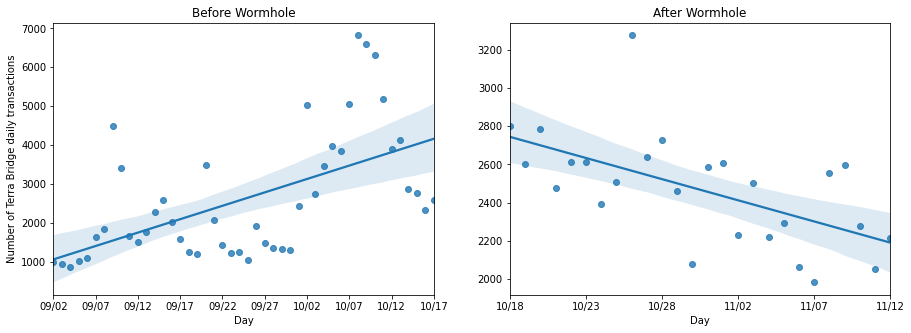

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = sns.regplot([i for i in range(len(before_wh.values))],before_wh.values, ax=axes[0])
xticks = []
for i in range(len(before_wh.index)):
    if(i%round(len(before_wh.index)/10)==0):
        xticks.append(before_wh.index[i])
ax.set_xticklabels(xticks)
ax.set(ylabel='Number of Terra Bridge daily transactions', xlabel='Day')
ax.set_title("Before Wormhole")
ax = sns.regplot([i for i in range(len(after_wh.values))],after_wh.values,ax=axes[1])
xticks = []
for i in range(len(after_wh.index)):
    if(i%math.ceil(len(after_wh.index)/6)==0):
        xticks.append(after_wh.index[i])
ax.set_xticklabels(xticks)
ax.set(xlabel='Day')
ax.set_title("After Wormhole")
ax.plot()

**Observations**
* 
* 

## Conversion Ratio

In [67]:
chains_to_compare = ['BSC','Ethereum', 'Harmony', 'Solana', 'Polygon']

In [68]:
tb_chain_address = tb_all[tb_all.chain.isin(chains_to_compare)].apply(lambda row: \
                        row.from_address if row.to_address == 'terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2'\
                                     else row.from_address, axis=1)

both_bridges_address = set(wh_receive_.address.append(wh_send.address).values).intersection(tb_all['address'].values)

In [74]:
wh_all = wh_receive_.append(wh_send)
wh_chains_all = wh_receive_.append(wh_send[wh_send.recipient_chain_name.isin(chains_to_compare)])
both_bridges_address = set(wh_chains_all.address.values)\
                           .intersection(tb_chain_address)

In [75]:
len(both_bridges_address)

852

In [76]:
f"{'{:.2f}'.format(len(both_bridges_address)/len(set(tb_chain_address.values))*100)}% of all address using TB have used Wormhole"

'3.32% of all address using TB have used Wormhole'

<AxesSubplot:ylabel='Density'>

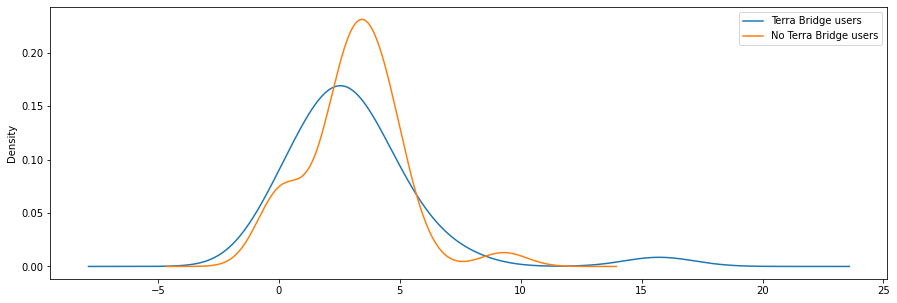

In [79]:
#ax = plt.gca()
df_1 = wh_chains_all[wh_chains_all.address.isin(both_bridges_address)]\
            .groupby('address').month_day.min().value_counts().sort_index().rename('Terra Bridge users')
df_1 = df_1/len(both_bridges_address)*100
df3 = wh_all[~wh_all.address.isin(both_bridges_address)]
df_2 = df3.groupby('address').month_day.min().value_counts().sort_index().rename('No Terra Bridge users')
df_2 = df_2/df3.address.nunique()*100
#.plot(kind='bar', ax=ax)
df_3 = pd.DataFrame([df_1,df_2]).transpose().fillna(0)
df_3.plot(kind='density')

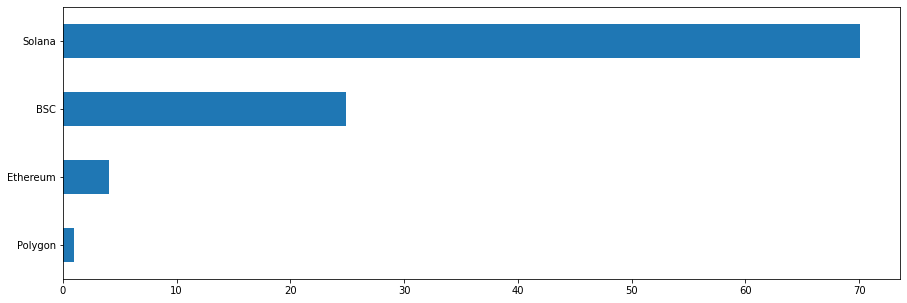

In [97]:
df = wh_send[wh_send.address.isin(both_bridges_address)]
ax = df.loc[df.groupby('address').idxmin().block_timestamp.values]\
            .recipient_chain_name.value_counts(normalize=True).multiply(100).sort_values().plot(kind='barh')

## Conclusions

**----------------------------------------------------------------------------------------------------**

# Appendix

## Data preparation

**Imports**

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress
import warnings
import json
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.options.display.max_colwidth = 10000

### Chain IDs:
* 1 -> Solana
* 2 -> Ethereum
* 3 -> Terra
* 4 -> BSC
* 5 -> Polygon

In [159]:
chain_ids = ['Solana', 'Ethereum', 'Terra', 'BSC', 'Polygon']

In [160]:
#with open("./tokens.json", "w") as f:
    #f.write(json.dumps(tokens))
with open("./tokens.json", "r") as f:
    tokens = json.load(f)

In [172]:
url_wh_receive = 'https://api.flipsidecrypto.com/api/v2/queries/657279fb-8a07-4089-bf08-307fb7f1325d/data/latest'
url_wh_receive_tokens = 'https://api.flipsidecrypto.com/api/v2/queries/f5ee257d-91d9-4a1d-a3e3-c2cd14f7790b/data/latest'
url_wh_send = 'https://api.flipsidecrypto.com/api/v2/queries/6cecbc05-4540-4c33-9557-585aec1af791/data/latest'

In [173]:
wh_receive_raw = pd.read_json(url_wh_receive)
wh_receive_token_raw = pd.read_json(url_wh_receive_tokens)
wh_send_raw = pd.read_json(url_wh_send)

**Preparation**

In [174]:
wh_receive = wh_receive_raw[['AMOUNT', 'BLOCK_TIMESTAMP', 'CHAIN_ID',
       'DENOM', 'ORIGINAL_SENDER', 'RECIPIENT', 'SENDER',
       'TX_ID', 'TX_MODULE', 'TX_STATUS', 'TX_TYPE']]
wh_receive = wh_receive[wh_receive.TX_STATUS == 'SUCCEEDED']
wh_receive.columns = [s.lower() for s in wh_receive.columns]
wh_receive.block_timestamp = pd.to_datetime(wh_receive.block_timestamp)
wh_receive['month_day'] = wh_receive.block_timestamp.apply(lambda b: f"{b.month}/{'{:02}'.format(b.day)}")
wh_receive.denom=wh_receive.denom.apply(lambda x: x.replace("\"","") if x else '')
wh_receive.recipient=wh_receive.recipient.apply(lambda x: x.replace("\"","") if x else '')
wh_receive.original_sender=wh_receive.original_sender.apply(lambda x: x.replace("\"","") if x else '')
wh_receive['token_name'] = wh_receive.apply(lambda r: r.denom if r.denom else '', axis=1)

In [175]:
wh_receive_token = wh_receive_token_raw[['AMOUNT', 'BLOCK_TIMESTAMP','RECIPIENT', 'TOKEN_ADDRESS', 'TX_ID', 'TX_STATUS']]
wh_receive_token = wh_receive_token[wh_receive_token.TX_STATUS == 'SUCCEEDED']
wh_receive_token.columns = [s.lower() for s in wh_receive_token.columns]
wh_receive_token.token_address=wh_receive_token.token_address.apply(lambda x: x.replace("\"","") if x else '')
wh_receive_token['token_name'] = wh_receive_token.token_address.apply(lambda x: 
                                            f"{tokens[x]['symbol']}_{chain_ids[int(tokens[x]['asset_chain'])-1]}" if x in tokens else '')

wh_receive_token.block_timestamp = pd.to_datetime(wh_receive_token.block_timestamp)
wh_receive_token['month_day'] = wh_receive_token.block_timestamp.apply(lambda b: f"{b.month}/{'{:02}'.format(b.day)}")

In [176]:
r1 = wh_receive[['amount', 'block_timestamp',
       'recipient', 'original_sender', 'sender', 'tx_id',
       'token_name', 'month_day']]

In [177]:
r2 = wh_receive_token[['amount', 'block_timestamp', 'recipient', 'tx_id',
       'token_name', 'month_day']]
r2['sender'] = r2.recipient
r2['original_sender'] = r2.recipient

In [182]:
wh_receive_ = r1.append(r2)
wh_receive_['year_month_day'] = wh_receive_.block_timestamp.apply(lambda b: f"{b.year}/{'{:02}'.format(b.month)}/{'{:02}'.format(b.day)}")
wh_receive_ = wh_receive_[wh_receive_.year_month_day<'2021/11/15']

In [184]:
wh_send_raw = wh_send_raw[wh_send_raw.TX_STATUS == 'SUCCEEDED']
wh_send = wh_send_raw[['BLOCK_TIMESTAMP',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:ASSET:AMOUNT',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:ASSET:INFO:NATIVE_TOKEN:DENOM',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:ASSET:INFO:TOKEN:CONTRACT_ADDR',
       'MSG_VALUE:EXECUTE_MSG:INITIATE_TRANSFER:RECIPIENT_CHAIN',
       'MSG_VALUE:SENDER', 'TX_ID']]
wh_send.columns = ['block_timestamp',
       'amount',
       'denom',
       'token_contract_addr',
       'recipient_chain',
       'sender', 'tx_id']
wh_send.block_timestamp = pd.to_datetime(wh_send.block_timestamp)
wh_send.token_contract_addr=wh_send.token_contract_addr.apply(lambda x: x.replace("\"","") if x else '')
wh_send.denom=wh_send.denom.apply(lambda x: x.replace("\"","") if x else '')
wh_send.amount=wh_send.amount.apply(lambda x: x.replace("\"","") if x else '').astype('int64')
wh_send.sender=wh_send.sender.apply(lambda x: x.replace("\"","") if x else '')
wh_send['token_addr_name'] = wh_send.token_contract_addr.apply(lambda x: 
                                            f"{tokens[x]['symbol']}_{chain_ids[tokens[x]['asset_chain']-1]}" if x in tokens else '')
wh_send['token_name'] = wh_send.apply(lambda r: r.denom if r.denom else r.token_addr_name, axis=1)
wh_send['month_day'] = wh_send.block_timestamp.apply(lambda b: f"{b.month}/{'{:02}'.format(b.day)}")
wh_send['year_month_day'] = wh_send.block_timestamp.apply(lambda b: f"{b.year}/{'{:02}'.format(b.month)}/{'{:02}'.format(b.day)}")
wh_send = wh_send[wh_send.year_month_day<'2021/11/15']

In [185]:
wh_all = wh_receive_.append(wh_send)

In [186]:
def add_missing_days(s):
    missing_days = ['10/08','10/09','10/10','10/11','10/16','10/17']
    for day in missing_days:
        s[day] = 0
    return s.sort_index()

### Terra Bridge - Data
Terra bridge - send:
  - https://api.flipsidecrypto.com/api/v2/queries/e6369cbf-6ea1-4d84-9e45-38ad88caea73/data/latest

Terra bridge - receive:
  - ETH: https://api.flipsidecrypto.com/api/v2/queries/a1688e27-7fcf-44ad-b849-e61dd638d8e1/data/latest
  - Others 1: https://api.flipsidecrypto.com/api/v2/queries/f6ac0f33-eaee-4983-82c3-7bba1ccc0bc2/data/latest
  - Others 2: https://api.flipsidecrypto.com/api/v2/queries/f566ad03-b305-448c-8a14-7908c0bfa7d7/data/latest  

In [134]:
tb_chains = {
    "terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc":"Ethereum",
    "terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2": "BSC",
    "terra1rtn03a9l3qsc0a9verxwj00afs93mlm0yr7chk": "Harmony"
}

In [135]:
url_tb_send = 'https://api.flipsidecrypto.com/api/v2/queries/e6369cbf-6ea1-4d84-9e45-38ad88caea73/data/latest'
url_tb_receive_eth = 'https://api.flipsidecrypto.com/api/v2/queries/a1688e27-7fcf-44ad-b849-e61dd638d8e1/data/latest'
url_tb_receive_others1 = 'https://api.flipsidecrypto.com/api/v2/queries/f6ac0f33-eaee-4983-82c3-7bba1ccc0bc2/data/latest'
url_tb_receive_others2 = 'https://api.flipsidecrypto.com/api/v2/queries/f566ad03-b305-448c-8a14-7908c0bfa7d7/data/latest'


In [136]:
tb_send_raw = pd.read_json(url_tb_send)
tb_receive_eth_raw = pd.read_json(url_tb_receive_eth)
tb_receive_others1_raw = pd.read_json(url_tb_receive_others1)
tb_receive_others2_raw = pd.read_json(url_tb_receive_others2)

In [137]:
tb_send = tb_send_raw
tb_send.columns = [x.lower() for x in tb_send.columns]
tb_send.block_timestamp = pd.to_datetime(tb_send.block_timestamp)
tb_send.denom=tb_send.denom.apply(lambda x: x.replace("\"","") if x else '')
tb_send.from_address=tb_send.from_address.apply(lambda x: x.replace("\"","") if x else '')
tb_send.to_address=tb_send.to_address.apply(lambda x: x.replace("\"","") if x else '')
tb_send['chain'] = tb_send.to_address.apply(lambda x: tb_chains[x] if x in tb_chains else '')

In [138]:
tb_send = tb_send[['amount', 'block_timestamp', 'denom',
       'from_address', 'to_address', 'tx_id', 'chain']]

In [139]:
tb_send.head()

,amount,block_timestamp,denom,from_address,to_address,tx_id,chain
0,5377208,2021-02-19 11:31:50+00:00,uusd,terra1g788na23zczk9tvpaygvqk407rlc463arywdxr,terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2,25EAB5D23F10B4AA8D74E4420B3389F7D9B4650940AE04B16A5D8D640C2BDA78,BSC
1,1.000000000000000e+10,2021-02-19 11:31:56+00:00,uusd,terra1fuem03h44ey7agx6s8ftr6uw9p546skt3jxgl8,terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2,E64048C82E5CC307BC60C60178BF02CA9C97A948936E68B70A961E08BDCC878B,BSC
2,1.000000000000000e+08,2021-02-19 11:34:29+00:00,uusd,terra14d99dqgrq60wjtsa40x2j2pc45khaznr3s9mz9,terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2,EEF0D92DB63F87106E4D2A532F7577445C4D77132D8ED2F3F162BF2FD26EA403,BSC
3,6.877512100000000e+07,2021-02-19 11:45:14+00:00,uusd,terra18clvf9n5e377l9cdjuk38ycw97vhxqnek47rv9,terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2,726E52B80DDD1C2AF08F5752DE0C2D8A750CA5AB282587CA73BC698A09526FB7,BSC
4,3000000,2021-02-19 11:48:31+00:00,uusd,terra1e06ddvprmdjd0pc05kn53cw0kclmmpaj6vrrzx,terra1g6llg3zed35nd3mh9zx6n64tfw3z67w2c48tn2,88364E3F926522D273BAE09207C3551C0DF70487E43ECD31E13C111D6C2AE36F,BSC


In [140]:
tb_receive = tb_receive_eth_raw.append(tb_receive_others1_raw).append(tb_receive_others2_raw)

In [141]:
tb_receive.columns = [x.lower() for x in tb_receive.columns]
tb_receive.block_timestamp = pd.to_datetime(tb_receive.block_timestamp)
tb_receive.denom=tb_receive.denom.apply(lambda x: x.replace("\"","") if x else '')
tb_receive.from_address=tb_receive.from_address.apply(lambda x: x.replace("\"","") if x else '')
tb_receive.to_address=tb_receive.to_address.apply(lambda x: x.replace("\"","") if x else '')
tb_receive['chain'] = tb_receive.from_address.apply(lambda x: tb_chains[x] if x in tb_chains else '')

In [142]:
tb_receive = tb_receive[['amount', 'block_timestamp', 'denom',
       'from_address', 'to_address', 'tx_id', 'chain']]

In [143]:
tb_receive.head()

,amount,block_timestamp,denom,from_address,to_address,tx_id,chain
0,1.000000000000000e+10,2021-02-08 15:10:32+00:00,uusd,terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc,terra1ykevv8ug5ag9gt2en0lgkd87rryk536w55r56m,0AEA25ED35C2002BFD934DF98B24D5094EE90F20BA35F01F85ED9B6044962835,Ethereum
1,2.001700000000000e+10,2021-02-08 15:14:45+00:00,uusd,terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc,terra1l09rnm06dk46ndavy906qadwu62te037nagm8m,484F47BD32DBA2F8A629CB2FF06604BA8BE0A901BD98E239319B9C3CD8CAD272,Ethereum
2,1.000000000000000e+10,2021-02-08 15:15:18+00:00,uusd,terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc,terra1ykevv8ug5ag9gt2en0lgkd87rryk536w55r56m,8E14D004269685CC90C5565C959935CA63AB3D6A6E7111E435ED2D40CB9614FB,Ethereum
3,1.327400000000000e+10,2021-02-08 15:18:30+00:00,uusd,terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc,terra1l09rnm06dk46ndavy906qadwu62te037nagm8m,324C2DC69248EEAA47DA2A640E72F2DCEC0767EC510FD6B6CF3A05FEB1490694,Ethereum
4,1.872600000000000e+10,2021-02-08 15:18:30+00:00,uusd,terra13yxhrk08qvdf5zdc9ss5mwsg5sf7zva9xrgwgc,terra1l09rnm06dk46ndavy906qadwu62te037nagm8m,324C2DC69248EEAA47DA2A640E72F2DCEC0767EC510FD6B6CF3A05FEB1490694,Ethereum


In [144]:
tb_receive['type_op'] = 'RECEIVE'
tb_send['type_op'] = 'SEND'

In [187]:
tb_all = tb_send.append(tb_receive)
tb_all['month_day'] = tb_all.block_timestamp.apply(lambda b: f"{'{:02}'.format(b.month)}/{'{:02}'.format(b.day)}")
tb_all['year_month_day'] = tb_all.block_timestamp.apply(lambda b: f"{b.year}/{'{:02}'.format(b.month)}/{'{:02}'.format(b.day)}")
tb_all = tb_all[tb_all.year_month_day<'2021/11/15']
